In [1]:
import herbie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

 ╭─▌▌Herbie─────────────────────────────────────────────╮
 │ WARNING: Unable to create config file               │
 │      /Users/thomas/.config/herbie/config.toml        │
 │ Herbie will use standard default settings.           │
 │ Consider setting env variable HERBIE_CONFIG_PATH.    │
 ╰──────────────────────────────────────────────────────╯



In [2]:
def get_temp(time, coordinates):
    """
    Finds the outside temperature at a given time and coordinates
    If time is in the past, it will retrieve past data
    If time is in the future, it will find the forecast
    """

    # Convert to UTC (Maine is UTC-4)
    time += timedelta(hours=4)

    # Get current UTC time (round to the hour)
    now = datetime.utcnow().replace(minute=0, second=0, microsecond=0)

    # If time is in the past
    if time < now:
        H = herbie.Herbie(
            time.strftime("%Y-%m-%d %H:%M"),
            model='hrrr', 
            product='sfc',
            fxx=0,
        )
        
    # If time is now or in the future
    else:
        H = herbie.Herbie(
            (now-timedelta(hours=1)).strftime("%Y-%m-%d %H:%M"),
            model='hrrr', 
            product='sfc',
            fxx=int((time - now).total_seconds()/3600)+1,
        )

    # Get dataset
    ds = H.xarray("TMP:2 m")

    # Get the temperature at coordinates
    x = herbie.accessors.HerbieAccessor(ds)
    temperature = x.pick_points(pd.DataFrame(coordinates), method='nearest')['t2m'].values[0] 

    return temperature


In [3]:
# Today's date in Maine (UTC-4)
today = (datetime.utcnow()-timedelta(hours=4))
today_midnight = today.replace(hour=0, minute=0, second=0, microsecond=0)

# Coordinates of a point in Maine
coordinates = {'latitude': [45.36], 'longitude': [-68.97]}

# Get today's weather at that point
wf_herbie = []
for hour in range(24):
    try:
        temp = get_temp(today_midnight+timedelta(hours=hour), coordinates)
        wf_herbie.append(temp)
        print(f'Hour {hour}: {temp} Kelvin')
    except Exception as e:
        print(e)
        wf_herbie.append(np.nan)


/var/folders/c3/d3fq0hlj3j7gpdh35ylfyy1h0000gp/T/ipykernel_15703/1503580175.py:2: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  today = (datetime.utcnow()-timedelta(hours=4))
/var/folders/c3/d3fq0hlj3j7gpdh35ylfyy1h0000gp/T/ipykernel_15703/2296957500.py:12: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.utcnow().replace(minute=0, second=0, microsecond=0)


✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-03 04:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
Hour 0: 284.5180969238281 Kelvin


/var/folders/c3/d3fq0hlj3j7gpdh35ylfyy1h0000gp/T/ipykernel_15703/2296957500.py:12: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.utcnow().replace(minute=0, second=0, microsecond=0)


✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-03 05:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
Hour 1: 284.05633544921875 Kelvin


/var/folders/c3/d3fq0hlj3j7gpdh35ylfyy1h0000gp/T/ipykernel_15703/2296957500.py:12: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.utcnow().replace(minute=0, second=0, microsecond=0)


✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-03 06:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
Hour 2: 283.8386535644531 Kelvin


/var/folders/c3/d3fq0hlj3j7gpdh35ylfyy1h0000gp/T/ipykernel_15703/2296957500.py:12: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.utcnow().replace(minute=0, second=0, microsecond=0)


✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-03 07:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
Hour 3: 283.4034423828125 Kelvin


/var/folders/c3/d3fq0hlj3j7gpdh35ylfyy1h0000gp/T/ipykernel_15703/2296957500.py:12: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.utcnow().replace(minute=0, second=0, microsecond=0)


✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-03 08:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
Hour 4: 282.72796630859375 Kelvin


/var/folders/c3/d3fq0hlj3j7gpdh35ylfyy1h0000gp/T/ipykernel_15703/2296957500.py:12: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.utcnow().replace(minute=0, second=0, microsecond=0)


✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-03 09:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
Hour 5: 282.31634521484375 Kelvin


/var/folders/c3/d3fq0hlj3j7gpdh35ylfyy1h0000gp/T/ipykernel_15703/2296957500.py:12: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.utcnow().replace(minute=0, second=0, microsecond=0)


✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-03 10:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
Hour 6: 281.88885498046875 Kelvin


/var/folders/c3/d3fq0hlj3j7gpdh35ylfyy1h0000gp/T/ipykernel_15703/2296957500.py:12: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.utcnow().replace(minute=0, second=0, microsecond=0)


✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-03 11:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
Hour 7: 282.7024230957031 Kelvin


/var/folders/c3/d3fq0hlj3j7gpdh35ylfyy1h0000gp/T/ipykernel_15703/2296957500.py:12: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.utcnow().replace(minute=0, second=0, microsecond=0)


✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-03 12:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
Hour 8: 285.1565246582031 Kelvin


/var/folders/c3/d3fq0hlj3j7gpdh35ylfyy1h0000gp/T/ipykernel_15703/2296957500.py:12: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.utcnow().replace(minute=0, second=0, microsecond=0)


✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-03 13:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
Hour 9: 287.71368408203125 Kelvin


/var/folders/c3/d3fq0hlj3j7gpdh35ylfyy1h0000gp/T/ipykernel_15703/2296957500.py:12: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.utcnow().replace(minute=0, second=0, microsecond=0)


✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-03 14:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
Hour 10: 289.3343811035156 Kelvin


/var/folders/c3/d3fq0hlj3j7gpdh35ylfyy1h0000gp/T/ipykernel_15703/2296957500.py:12: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.utcnow().replace(minute=0, second=0, microsecond=0)


✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-03 15:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
Hour 11: 290.3520202636719 Kelvin


/var/folders/c3/d3fq0hlj3j7gpdh35ylfyy1h0000gp/T/ipykernel_15703/2296957500.py:12: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.utcnow().replace(minute=0, second=0, microsecond=0)


✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-03 16:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
Hour 12: 291.1760559082031 Kelvin


/var/folders/c3/d3fq0hlj3j7gpdh35ylfyy1h0000gp/T/ipykernel_15703/2296957500.py:12: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.utcnow().replace(minute=0, second=0, microsecond=0)


✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-03 17:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
Hour 13: 292.02716064453125 Kelvin


/var/folders/c3/d3fq0hlj3j7gpdh35ylfyy1h0000gp/T/ipykernel_15703/2296957500.py:12: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.utcnow().replace(minute=0, second=0, microsecond=0)


✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-03 18:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
Hour 14: 292.138427734375 Kelvin


/var/folders/c3/d3fq0hlj3j7gpdh35ylfyy1h0000gp/T/ipykernel_15703/2296957500.py:12: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.utcnow().replace(minute=0, second=0, microsecond=0)


✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-03 19:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
Hour 15: 292.557373046875 Kelvin


/var/folders/c3/d3fq0hlj3j7gpdh35ylfyy1h0000gp/T/ipykernel_15703/2296957500.py:12: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.utcnow().replace(minute=0, second=0, microsecond=0)


✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-03 19:00 UTC F01 ┊ GRIB2 @ aws ┊ IDX @ aws
Hour 16: 292.5679016113281 Kelvin


/var/folders/c3/d3fq0hlj3j7gpdh35ylfyy1h0000gp/T/ipykernel_15703/2296957500.py:12: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.utcnow().replace(minute=0, second=0, microsecond=0)


✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-03 19:00 UTC F02 ┊ GRIB2 @ aws ┊ IDX @ aws
Hour 17: 292.38787841796875 Kelvin


/var/folders/c3/d3fq0hlj3j7gpdh35ylfyy1h0000gp/T/ipykernel_15703/2296957500.py:12: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.utcnow().replace(minute=0, second=0, microsecond=0)


✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-03 19:00 UTC F03 ┊ GRIB2 @ aws ┊ IDX @ aws
Hour 18: 291.0085144042969 Kelvin


/var/folders/c3/d3fq0hlj3j7gpdh35ylfyy1h0000gp/T/ipykernel_15703/2296957500.py:12: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.utcnow().replace(minute=0, second=0, microsecond=0)


✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-03 19:00 UTC F04 ┊ GRIB2 @ aws ┊ IDX @ aws
Hour 19: 288.9872741699219 Kelvin


/var/folders/c3/d3fq0hlj3j7gpdh35ylfyy1h0000gp/T/ipykernel_15703/2296957500.py:12: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.utcnow().replace(minute=0, second=0, microsecond=0)


✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-03 19:00 UTC F05 ┊ GRIB2 @ aws ┊ IDX @ aws
Hour 20: 287.82550048828125 Kelvin


/var/folders/c3/d3fq0hlj3j7gpdh35ylfyy1h0000gp/T/ipykernel_15703/2296957500.py:12: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.utcnow().replace(minute=0, second=0, microsecond=0)


💔 Did not find ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-03 19:00 UTC F06

No index file was found for None
Download the full file first (with `H.download()`).
You will need to remake the Herbie object (H = `Herbie()`)
or delete this cached property: `del H.index_as_dataframe()`
💔 Did not find ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-03 19:00 UTC F07

No index file was found for None
Download the full file first (with `H.download()`).
You will need to remake the Herbie object (H = `Herbie()`)
or delete this cached property: `del H.index_as_dataframe()`
💔 Did not find ┊ model=hrrr ┊ product=sfc ┊ 2024-Sep-03 19:00 UTC F08

No index file was found for None
Download the full file first (with `H.download()`).
You will need to remake the Herbie object (H = `Herbie()`)
or delete this cached property: `del H.index_as_dataframe()`


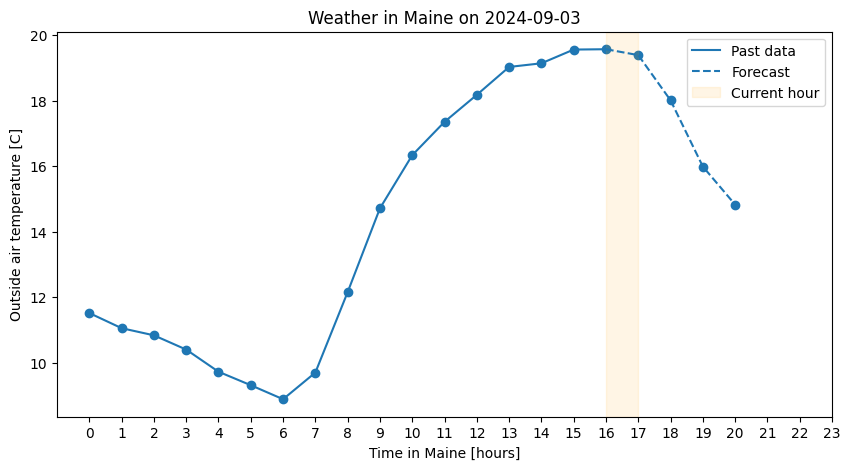

In [4]:
wf_herbie = [x-273 for x in wf_herbie]
plt.figure(figsize=(10, 5))
plt.plot(wf_herbie[:today.hour+1],label='Past data', color='tab:blue')
plt.plot([np.nan]*(today.hour) + wf_herbie[today.hour:], label='Forecast', linestyle='dashed', color='tab:blue')
plt.scatter(range(24), wf_herbie)
plt.axvspan(today.hour, today.hour+1, color='orange', alpha=0.1, label='Current hour')
plt.xticks(list(range(24)))
plt.xlabel('Time in Maine [hours]')
plt.ylabel('Outside air temperature [C]')
plt.title(f'Weather in Maine on {today.date()}')
plt.legend()
plt.show()